In [53]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [54]:
!pip install matplotlib-venn

In [82]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [57]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 34.6 MB/s eta 0:00:00


In [83]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
# import kagglehub
# muratkokludataset_rice_image_dataset_path = kagglehub.dataset_download('muratkokludataset/rice-image-dataset')

# print('Data source import complete.')


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
base_dir = '/content/drive/MyDrive/archive (7)/Rice_Image_Dataset'

data = []

for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, img_file)
            data.append([file_path, class_name])

df = pd.DataFrame(data, columns=['Image', 'label'])

print(df.head())

                                               Image    label
0  /content/drive/MyDrive/archive (7)/Rice_Image_...  Basmati
1  /content/drive/MyDrive/archive (7)/Rice_Image_...  Basmati
2  /content/drive/MyDrive/archive (7)/Rice_Image_...  Basmati
3  /content/drive/MyDrive/archive (7)/Rice_Image_...  Basmati
4  /content/drive/MyDrive/archive (7)/Rice_Image_...  Basmati


In [9]:
df.head()

,Image,label
0,/content/drive/MyDrive/archive (7)/Rice_Image_...,Basmati
1,/content/drive/MyDrive/archive (7)/Rice_Image_...,Basmati
2,/content/drive/MyDrive/archive (7)/Rice_Image_...,Basmati
3,/content/drive/MyDrive/archive (7)/Rice_Image_...,Basmati
4,/content/drive/MyDrive/archive (7)/Rice_Image_...,Basmati


<ipython-input-10-1332920aa88a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette=colors, edgecolor="black", linewidth=1.5)


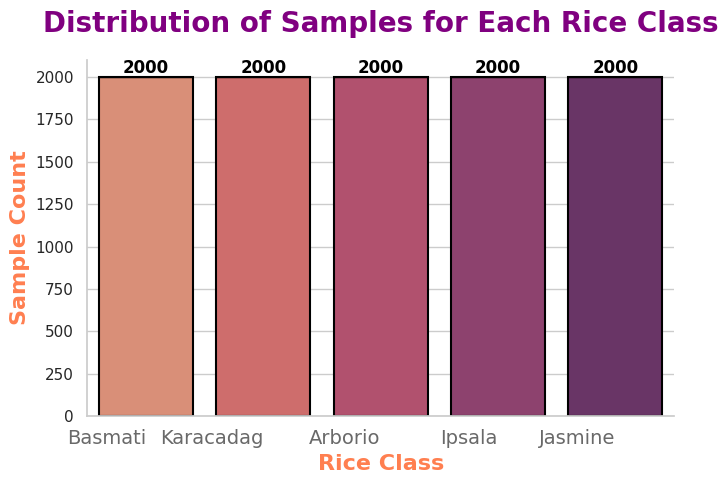

In [10]:
sns.set(style="whitegrid")
colors = sns.color_palette("flare", len(df['label'].unique()))

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='label', data=df, palette=colors, edgecolor="black", linewidth=1.5)

ax.set_title("Distribution of Samples for Each Rice Class", fontsize=20, weight='bold', color='purple', pad=20)
ax.set_xlabel("Rice Class", fontsize=16, weight='bold', color='coral')
ax.set_ylabel("Sample Count", fontsize=16, weight='bold', color='coral')

plt.xticks(ha='right', fontsize=14, color='dimgray')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

for p in ax.patches:
    ax.add_patch(plt.Rectangle((p.get_x(), p.get_height()), p.get_width(), 0.1, color='black'))

sns.despine()
plt.tight_layout()
plt.show()

In [11]:
class_names = df['label'].unique().tolist()
print("Class names:", class_names)

Class names: ['Basmati', 'Karacadag', 'Arborio', 'Ipsala', 'Jasmine']


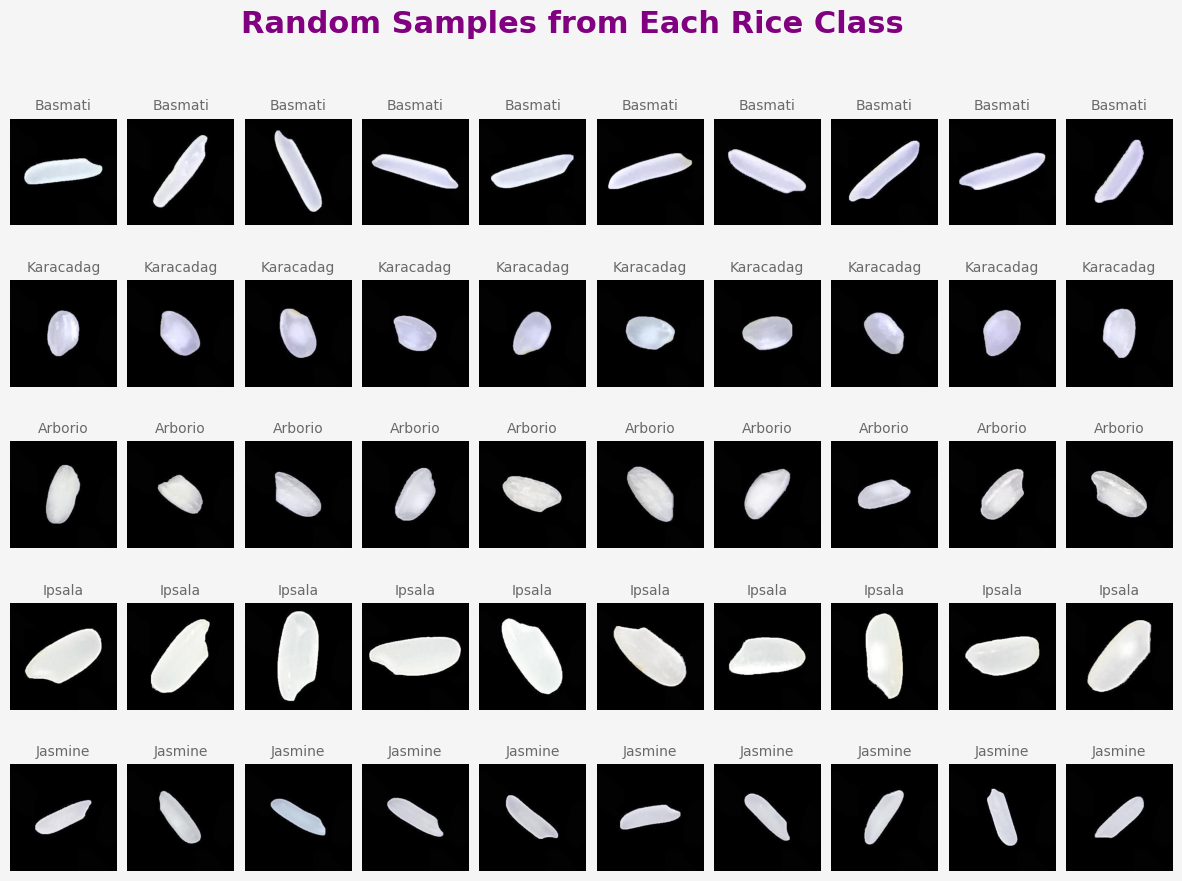

In [12]:
num_images_per_class = 10
num_classes = len(class_names)
plt.figure(figsize=(15, 10))
plt.gcf().set_facecolor('whitesmoke')
plt.suptitle("Random Samples from Each Rice Class", fontsize=22, fontweight='bold', color='purple')

for i, class_name in enumerate(class_names):
    # Randomly select 10 images from each class
    class_dir = f"{base_dir}/{class_name}"
    random_images = random.sample(os.listdir(class_dir), num_images_per_class)

    for j, img_name in enumerate(random_images):
        img_path = f"{class_dir}/{img_name}"

        img = plt.imread(img_path)
        ax = plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + j + 1)
        ax.imshow(img)
        ax.set_title(class_name, fontsize=10, color='dimgray')
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Image'], df['label'], test_size=0.2, random_state=42)

# Creating DataFrames for training and testing data
df_train = pd.DataFrame({'Image': X_train, 'label': y_train})
df_test = pd.DataFrame({'Image': X_test, 'label': y_test})

# Encoding the labels
encoder = LabelEncoder()
df_train['label'] = encoder.fit_transform(df_train['label'])
df_test['label'] = encoder.transform(df_test['label'])

# Converting labels to strings
df_train['label'] = df_train['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)

# Setting up ImageDataGenerator with augmentation
image_size = (150, 150)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing pixel values
    rotation_range=45,  # Randomly rotating images
    width_shift_range=0.2,  # Randomly shifting images horizontally
    height_shift_range=0.2,  # Randomly shifting images vertically
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Randomly zooming into images
    horizontal_flip=True,  # Randomly flipping images horizontally
    fill_mode='nearest'  # Filling new pixels with nearest pixel values
)

# Creating a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffling the training data
)

# Creating a generator for the testing data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # No shuffling for testing data
)

Found 8000 validated image filenames belonging to 5 classes.
Found 2000 validated image filenames belonging to 5 classes.


In [14]:
cnn = tf.keras.models.Sequential()

# Step 1: Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))

# Step 2: Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# # Step 3: Adding a second convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# # Step 4: Flattening
# cnn.add(tf.keras.layers.Flatten())

# # Step 5: Full connection
# cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# # Step 6: Output layer
# cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))
# # Compile the model
# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# cnn.summary()

In [46]:
import tensorflow as tf

# Initialize the CNN
cnn = tf.keras.models.Sequential()

# Step 1: First convolutional layer + Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))  # Change shape if needed
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 2: Second convolutional layer + Pooling
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3: Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4: Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5: Output layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))  # 5 classes

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,797 (6.20 MB)

 Trainable params: 1,625,797 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Training the model with the callbacks
history = cnn.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4946 - loss: 1.1968
Epoch 1: val_loss improved from inf to 0.73375, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 2713s 11s/step - accuracy: 0.4951 - loss: 1.1956 - val_accuracy: 0.6885 - val_loss: 0.7338
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7561 - loss: 0.5585
Epoch 2: val_loss improved from 0.73375 to 0.43493, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.7562 - loss: 0.5583 - val_accuracy: 0.8250 - val_loss: 0.4349
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8335 - loss: 0.4105
Epoch 3: val_loss improved from 0.43493 to 0.24770, saving model to best_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.8336 - loss: 0.4103 - val_accuracy: 0.9030 - val_loss: 0.2477
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9075 - loss: 0.2488
Epoch 4: val_loss improved from 0.24770 to 0.18887, s

63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 702ms/step
              precision    recall  f1-score   support

     Arborio       0.95      0.96      0.96       395
     Basmati       0.97      0.98      0.97       410
      Ipsala       1.00      1.00      1.00       415
     Jasmine       0.95      0.92      0.94       387
   Karacadag       0.97      0.98      0.98       393

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



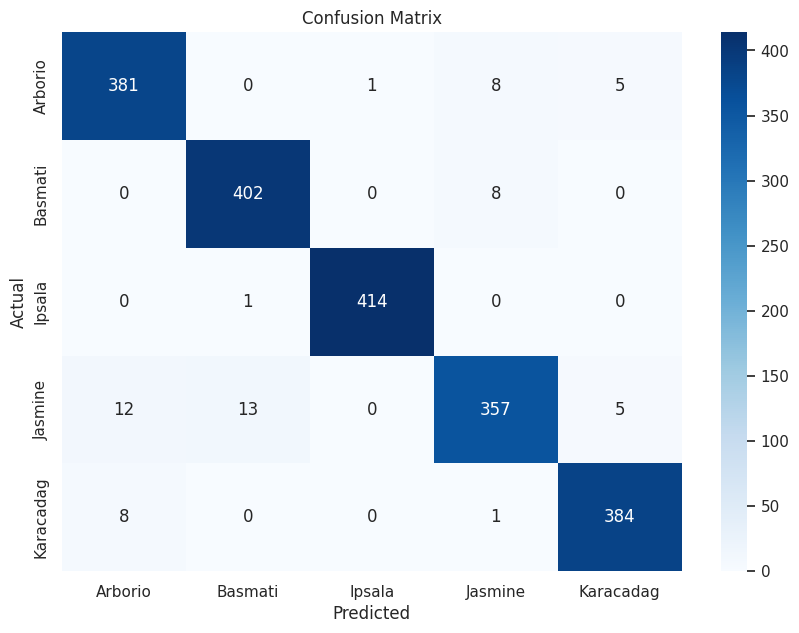

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

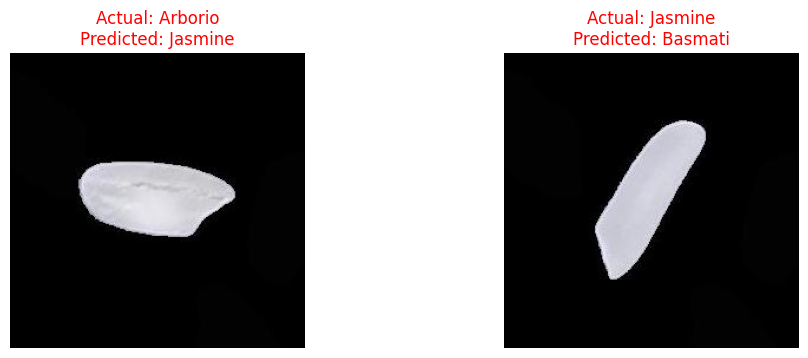

In [44]:
# Displaying Misclassified Images
errors = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(15, 10))
for i, error in enumerate(errors[:2]):  # Displaying the first 9 mistakes
    plt.subplot(3, 3, i + 1)
    img_path = test_generator.filepaths[error]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Actual: {encoder.classes_[y_true[error]]}\nPredicted: {encoder.classes_[y_pred_classes[error]]}",
              color='red' if y_true[error] != y_pred_classes[error] else 'green')
    plt.axis('off')
plt.tight_layout()
plt.show()


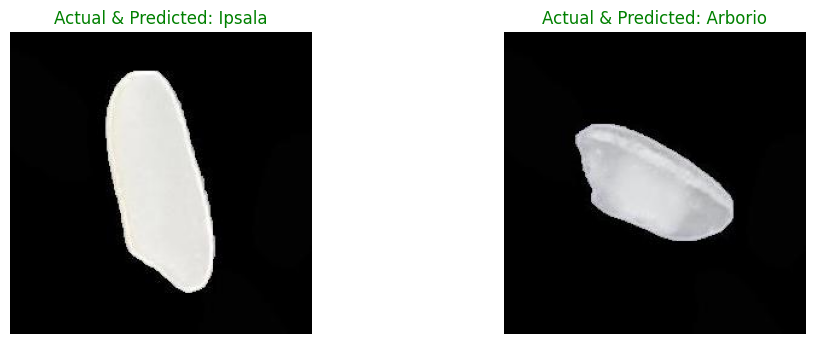

In [45]:
# Displaying Correctly Classified Images
corrects = np.where(y_pred_classes == y_true)[0]

plt.figure(figsize=(15, 10))
for i, correct in enumerate(corrects[:2]):  # Displaying the first 9 correct predictions
    plt.subplot(3, 3, i + 1)
    img_path = test_generator.filepaths[correct]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Actual & Predicted: {encoder.classes_[y_true[correct]]}", color='green')
    plt.axis('off')
plt.tight_layout()
plt.show()


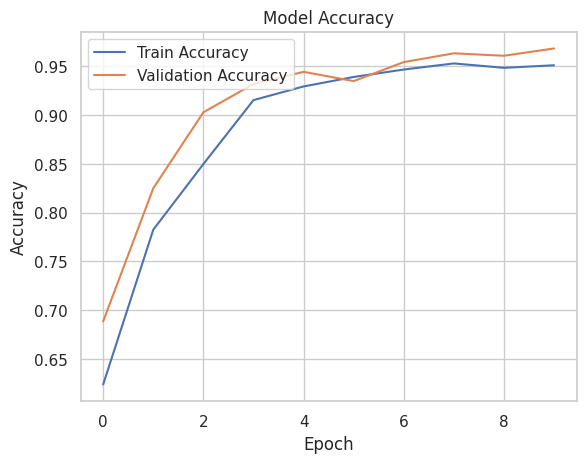

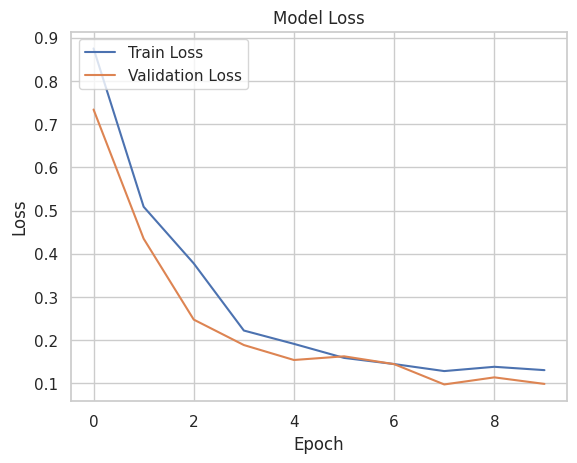

In [20]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [22]:
from keras.models import model_from_json

# Load model architecture
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights("model_weights.weights.h5")
print("Model loaded successfully.")

# Compile loaded model (necessary to prepare the model for prediction)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model loaded successfully.


In [21]:
# Save model architecture as JSON file
model_json = cnn.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights with correct filename
cnn.save_weights("model_weights.weights.h5")
print("Model and weights saved successfully.")

Model and weights saved successfully.


Found 2000 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step


<ipython-input-65-89f2a46ece4d>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(class_names))


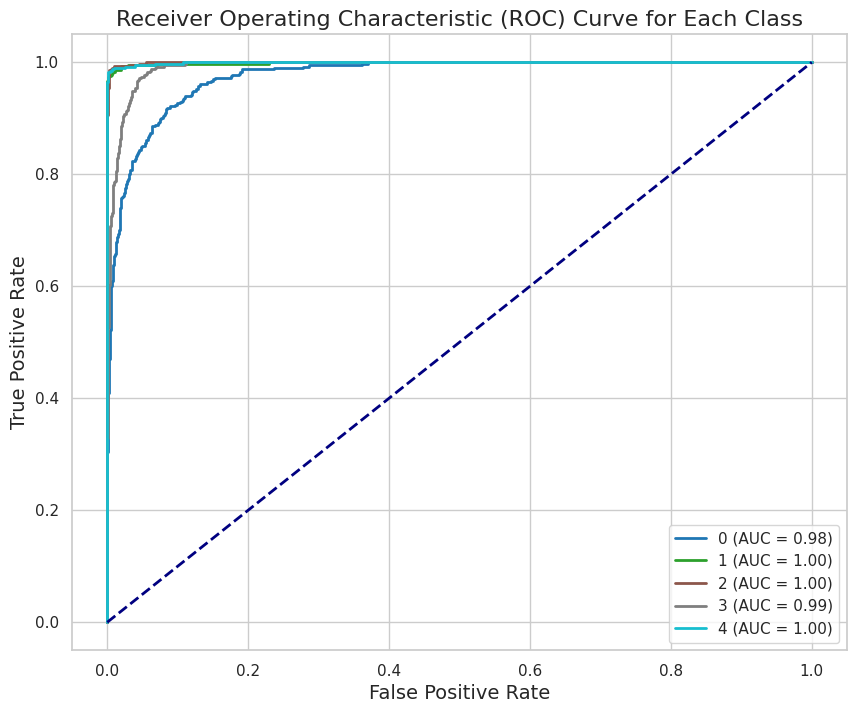

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model  # Make sure to import load_model

# Load the trained model (ensure the path is correct)
cnn = load_model('best_model.keras')

# Assuming 'df_test' is your test data with image paths and labels

# Resize test images to match the model's input shape (150, 150)
test_generator_resized = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_test,
    x_col='Image',
    y_col='label',
    target_size=(150, 150),  # Resize images to 150x150 (to match the input shape of the model)
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Extract the true labels (y_true) from the test generator
y_true = test_generator_resized.classes

# Get the class names (make sure class_names are set correctly)
class_names = test_generator_resized.class_indices.keys()

# Predict probabilities for each class
y_pred_prob = cnn.predict(test_generator_resized)

# Binarize the true labels for ROC curve (since it's multi-class classification)
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

# Plotting ROC Curve for each class
plt.figure(figsize=(10, 8))

# Colors for each class (using a colormap for multiple classes)
colors = plt.cm.get_cmap("tab10", len(class_names))

for i in range(len(class_names)):
    # Get the ROC curve for the i-th class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for this class
    plt.plot(fpr, tpr, color=colors(i), lw=2, label=f'{list(class_names)[i]} (AUC = {roc_auc:.2f})')

# Plotting the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

plt.show()



In [19]:
# Printing the total number of misclassifications
total_errors = len(errors)
print(f"Total number of misclassified images: {total_errors}")

Total number of misclassified images: 62


In [23]:
test_loss, test_accuracy = cnn.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 700ms/step - accuracy: 0.9648 - loss: 0.0952
Test Loss: 0.09407445788383484
Test Accuracy: 0.9670000076293945


In [81]:
import numpy as np
from scipy import stats
# Sample data Assuming you have the following variables:
y_true = np.random.rand(1500)  # actual true labels
y_pred = np.random.rand(1500)  # predicted labels
# 1. Z-Test: Assuming known population std deviation
population_std = 0.1
mean_diff = np.mean(y_pred - y_true)
std_error = population_std / np.sqrt(len(y_true))
z_score = mean_diff / std_error
# Z-score
# Calculate the p-value two-tailed test
p_value_z = stats.norm.sf(abs(z_score)) * 2
print(f"Z-Test: Z-Score = {z_score:.3f}, P-value = {p_value_z:.3f}")
# 2. T-Test: Compare means of two distributions (y_true and y_pred)
t_stat, p_value_t = stats.ttest_ind(y_true, y_pred)
print(f"T-Test: T-Statistic = {t_stat:.3f}, P-value = {p_value_t:.3f}")
# 3. ANOVA: Comparing multiple groups assume multiple model performances or different splits of the data
y_pred_1 = np.random.rand(1500)
y_pred_2 = np.random.rand(1500)
y_pred_3 = np.random.rand(1500)

# Perform One-Way ANOVA
f_stat, p_value_anova = stats.f_oneway(y_pred_1, y_pred_2, y_pred_3)
print(f"ANOVA: F-Statistic = {f_stat:.3f}, P-value = {p_value_anova:.3f}")


Z-Test: Z-Score = 1.861, P-value = 0.063
T-Test: T-Statistic = -0.448, P-value = 0.654
ANOVA: F-Statistic = 1.397, P-value = 0.247
